In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/UNB/Binary/Base_classifier_result(URL cross)(2).csv")
data.head()

,labels,rfc_prediction_non,rfc_prediction_phish,svc_prediction_non,svc_prediction_phish,lr_prediction_non,lr_prediction_phish
0,0,0.988322,0.011678,0.930231,0.069769,0.866125,1.338746e-01
1,1,0.014000,0.986000,0.066593,0.933407,0.158799,8.412012e-01
2,0,0.976407,0.023593,0.951599,0.048401,1.000000,1.070076e-08
3,1,0.013240,0.986760,0.054215,0.945785,0.001640,9.983597e-01
4,0,0.848585,0.151415,0.227756,0.772244,0.522085,4.779155e-01


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   labels                2938 non-null   int64  
 1   rfc_prediction_non    2938 non-null   float64
 2   rfc_prediction_phish  2938 non-null   float64
 3   svc_prediction_non    2938 non-null   float64
 4   svc_prediction_phish  2938 non-null   float64
 5   lr_prediction_non     2938 non-null   float64
 6   lr_prediction_phish   2938 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 160.8 KB


In [5]:
import numpy as np


y = data['labels'].values
x = np.array(data.drop('labels',axis=1))


print(x.shape, y.shape)

(2938, 6) (2938,)


In [6]:

import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_aa(x_train, x_val, y_train, y_val, opt, early_stopping_monitor):

  n_cols = x_train.shape[1]
  #create model
  model = Sequential()
  model.add(Dense(5, input_dim=6, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  
  #compile model using mse as a measure of model performance
  model.compile(optimizer = opt, loss= 'binary_crossentropy', metrics=["accuracy"])

  history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()


  print('Validation Accuracy: ')
  # Predicting the Test set results
  y_pred = model.predict(x_val)
  y_pred = (y_pred > 0.5)


  print(classification_report(y_val, y_pred))

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

  # Creating the Confusion Matrix
  cm = confusion_matrix(y_val, y_pred)
  print(cm)
  print('Precision: %.4f' % precision_score(y_val, y_pred))
  print('Recall: %.4f' % recall_score(y_val, y_pred))
  print('F1 Score: %.4f' % f1_score(y_val, y_pred))
  tn, fp, fn, tp = confusion_matrix(list(y_val), list(y_pred), labels=[0, 1]).ravel()

  print('True Positive', tp)
  print('True Negative', tn)
  print('False Positive', fp)
  print('False Negative', fn)

  return metrics.accuracy_score(y_val, y_pred)



Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.6922 - accuracy: 0.6218 - val_loss: 0.5956 - val_accuracy: 0.8265
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5626 - accuracy: 0.8188 - val_loss: 0.4907 - val_accuracy: 0.8707
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.8616 - val_loss: 0.4175 - val_accuracy: 0.9014
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8778 - val_loss: 0.3646 - val_accuracy: 0.9014
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8824 - val_loss: 0.3234 - val_accuracy: 0.9218
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.9017 - val_loss: 0.2905 - val_accuracy: 0.9388
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3098 - accuracy: 0.9089 - val_loss: 0.2642 - val_accuracy: 0.9422
Epoch 8/100
8

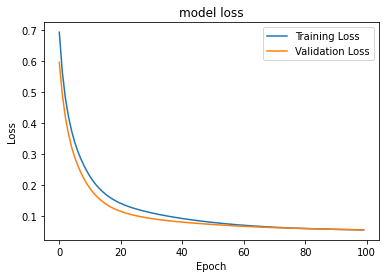

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       231
           1       0.97      0.94      0.95        63

    accuracy                           0.98       294
   macro avg       0.98      0.96      0.97       294
weighted avg       0.98      0.98      0.98       294

Accuracy: 0.9795918367346939
[[229   2]
 [  4  59]]
Precision: 0.9672
Recall: 0.9365
F1 Score: 0.9516
True Positive 59
True Negative 229
False Positive 2
False Negative 4
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.5910 - accuracy: 0.7833 - val_loss: 0.4274 - val_accuracy: 0.9048
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3191 - accuracy: 0.9444 - val_loss: 0.2729 - val_accuracy: 0.9456
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2186 - accuracy: 0.9546 - val_loss: 0.2074 - val_accuracy: 0.9490
Epoch 4/100
83/83 [==============================] - 0s 2

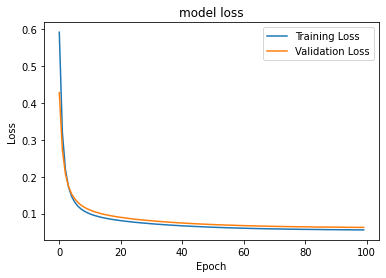

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       206
           1       0.94      0.97      0.96        88

    accuracy                           0.97       294
   macro avg       0.96      0.97      0.97       294
weighted avg       0.97      0.97      0.97       294

Accuracy: 0.9727891156462585
[[201   5]
 [  3  85]]
Precision: 0.9444
Recall: 0.9659
F1 Score: 0.9551
True Positive 85
True Negative 201
False Positive 5
False Negative 3
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.7315 - accuracy: 0.4187 - val_loss: 0.5869 - val_accuracy: 0.8707
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.9175 - val_loss: 0.5038 - val_accuracy: 0.9252
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.9402 - val_loss: 0.4691 - val_accuracy: 0.9388
Epoch 4/100
83/83 [==============================] - 0s 2

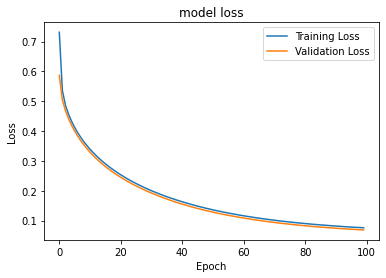

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       221
           1       0.96      0.97      0.97        73

    accuracy                           0.98       294
   macro avg       0.98      0.98      0.98       294
weighted avg       0.98      0.98      0.98       294

Accuracy: 0.9829931972789115
[[218   3]
 [  2  71]]
Precision: 0.9595
Recall: 0.9726
F1 Score: 0.9660
True Positive 71
True Negative 218
False Positive 3
False Negative 2
Epoch 1/100
83/83 [==============================] - 1s 5ms/step - loss: 0.4164 - accuracy: 0.9399 - val_loss: 0.2994 - val_accuracy: 0.9252
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.9486 - val_loss: 0.2216 - val_accuracy: 0.9286
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1967 - accuracy: 0.9535 - val_loss: 0.1826 - val_accuracy: 0.9286
Epoch 4/100
83/83 [==============================] - 0s 2

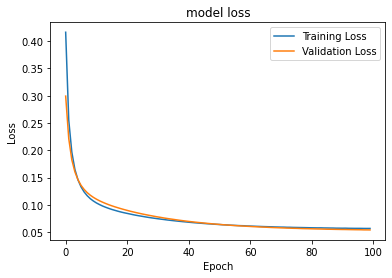

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.95      0.95      0.95        65

    accuracy                           0.98       294
   macro avg       0.97      0.97      0.97       294
weighted avg       0.98      0.98      0.98       294

Accuracy: 0.9795918367346939
[[226   3]
 [  3  62]]
Precision: 0.9538
Recall: 0.9538
F1 Score: 0.9538
True Positive 62
True Negative 226
False Positive 3
False Negative 3
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.7071 - accuracy: 0.5533 - val_loss: 0.6271 - val_accuracy: 0.9422
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5808 - accuracy: 0.9592 - val_loss: 0.5467 - val_accuracy: 0.9388
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.9554 - val_loss: 0.4971 - val_accuracy: 0.9388
Epoch 4/100
83/83 [==============================] - 0s 2

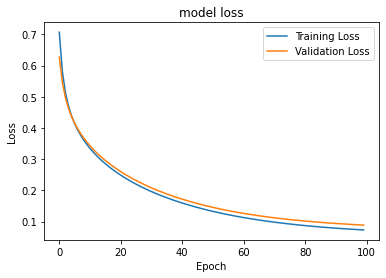

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       224
           1       0.95      0.90      0.93        70

    accuracy                           0.97       294
   macro avg       0.96      0.94      0.95       294
weighted avg       0.97      0.97      0.97       294

Accuracy: 0.9659863945578231
[[221   3]
 [  7  63]]
Precision: 0.9545
Recall: 0.9000
F1 Score: 0.9265
True Positive 63
True Negative 221
False Positive 3
False Negative 7
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.6261 - accuracy: 0.7814 - val_loss: 0.5708 - val_accuracy: 0.9320
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5435 - accuracy: 0.9497 - val_loss: 0.5193 - val_accuracy: 0.9320
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.9508 - val_loss: 0.4819 - val_accuracy: 0.9320
Epoch 4/100
83/83 [==============================] - 0s 2

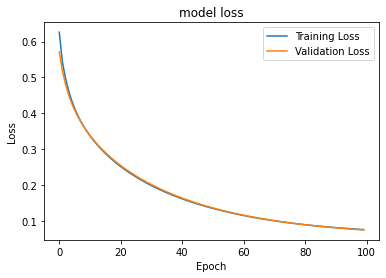

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       222
           1       0.96      0.97      0.97        72

    accuracy                           0.98       294
   macro avg       0.97      0.98      0.98       294
weighted avg       0.98      0.98      0.98       294

Accuracy: 0.9829931972789115
[[219   3]
 [  2  70]]
Precision: 0.9589
Recall: 0.9722
F1 Score: 0.9655
True Positive 70
True Negative 219
False Positive 3
False Negative 2
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.5892 - accuracy: 0.7224 - val_loss: 0.4511 - val_accuracy: 0.9660
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.9701 - val_loss: 0.3206 - val_accuracy: 0.9694
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2840 - accuracy: 0.9675 - val_loss: 0.2407 - val_accuracy: 0.9694
Epoch 4/100
83/83 [==============================] - 0s 3

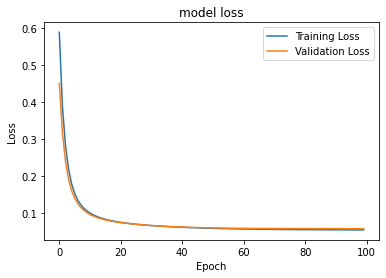

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       210
           1       0.98      0.95      0.96        84

    accuracy                           0.98       294
   macro avg       0.98      0.97      0.97       294
weighted avg       0.98      0.98      0.98       294

Accuracy: 0.9795918367346939
[[208   2]
 [  4  80]]
Precision: 0.9756
Recall: 0.9524
F1 Score: 0.9639
True Positive 80
True Negative 208
False Positive 2
False Negative 4
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.4195 - accuracy: 0.9225 - val_loss: 0.3219 - val_accuracy: 0.9184
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2756 - accuracy: 0.9387 - val_loss: 0.2346 - val_accuracy: 0.9422
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9573 - val_loss: 0.1819 - val_accuracy: 0.9660
Epoch 4/100
83/83 [==============================] - 0s 2

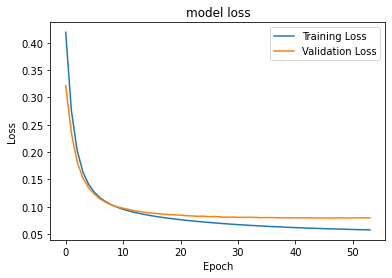

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       227
           1       0.98      0.88      0.93        67

    accuracy                           0.97       294
   macro avg       0.97      0.94      0.95       294
weighted avg       0.97      0.97      0.97       294

Accuracy: 0.9693877551020408
[[226   1]
 [  8  59]]
Precision: 0.9833
Recall: 0.8806
F1 Score: 0.9291
True Positive 59
True Negative 226
False Positive 1
False Negative 8
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.3674 - accuracy: 0.8699 - val_loss: 0.2725 - val_accuracy: 0.9420
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2565 - accuracy: 0.9198 - val_loss: 0.2002 - val_accuracy: 0.9488
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9316 - val_loss: 0.1531 - val_accuracy: 0.9659
Epoch 4/100
83/83 [==============================] - 0s 2

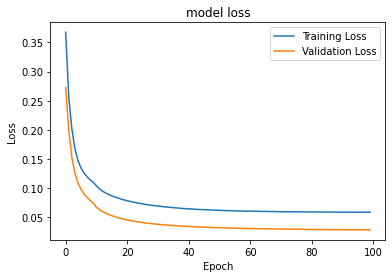

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       220
           1       0.97      0.99      0.98        73

    accuracy                           0.99       293
   macro avg       0.98      0.99      0.99       293
weighted avg       0.99      0.99      0.99       293

Accuracy: 0.9897610921501706
[[218   2]
 [  1  72]]
Precision: 0.9730
Recall: 0.9863
F1 Score: 0.9796
True Positive 72
True Negative 218
False Positive 2
False Negative 1
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.5269 - accuracy: 0.8318 - val_loss: 0.3885 - val_accuracy: 0.9693
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.9698 - val_loss: 0.2745 - val_accuracy: 0.9659
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2337 - accuracy: 0.9705 - val_loss: 0.2106 - val_accuracy: 0.9659
Epoch 4/100
83/83 [==============================] - 0s 2

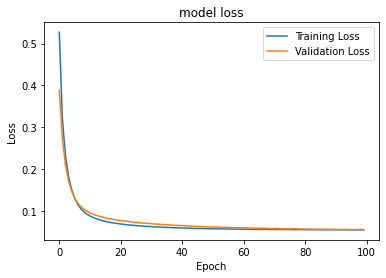

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       223
           1       0.96      0.97      0.96        70

    accuracy                           0.98       293
   macro avg       0.97      0.98      0.98       293
weighted avg       0.98      0.98      0.98       293

Accuracy: 0.9829351535836177
[[220   3]
 [  2  68]]
Precision: 0.9577
Recall: 0.9714
F1 Score: 0.9645
True Positive 68
True Negative 220
False Positive 3
False Negative 2
Average Validation Accuracy: 0.9785621415801815


In [7]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0

kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x, y):
  val_acc = model_aa(x[train], x[val], y[train], y[val], optimizer1, early_stopping_monitor)
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)

